# ECH 60 Spring 2022: HW 3

Rename this file as lastname_firstname and upload to canvas before 5pm Friday, April 29th.
<font color='red'> Total 4 points</font>. Partial points will be awarded ONLY IF a reasonable attempt has been made.

**PROBLEM 0:** Import `numpy` and `matplotlib.pyplot`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**PROBLEM 1:** The resistance $R$ (in Ohms) of a semiconductor at different temperatures $T$ (in K) is given by the Steinhart–Hart equation:

$$  \frac{1}{T} = A + B \ln R + C \left( \ln R \right)^2 + D \left( \ln R \right)^3, $$

where the constants $A$, $B$, $C$ and $D$ depend on the type of the material. In an experiment characterizing the resistance, the following data was measured

$$\begin{matrix} 
{T ~({\rm Celsius})}      & 276 & 279 & 282 & 284 & 290 & 295 & 298 & 305 & 320 & 360 \\
{R ~({\rm Ohm})}& 18950 & 17200 & 14950 & 13100 & 10930 & 9020 & 6960 & 4950 & 3100 & 950 \end{matrix}$$

Determine the material constants $A$, $B$, $C$ and $D$ using `polyval`. Show a plot of $R$ vs $T$ with the measured points as dots and the fit as a solid line.

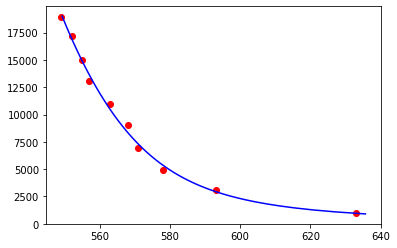

material constants: [ 3.86307411e-06 -1.02936294e-04  9.82838839e-04 -1.56539977e-03]


Material Constants are : A= 3.8631e-06 B= -0.0001029363 C= 0.0009828388 D= -0.0015653998


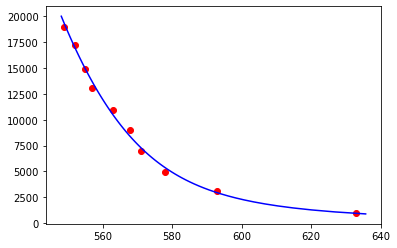

In [17]:
T0=np.array([276,279,282,284,290,295,298,305,320,360])
T1=T0+273
T2=1/T1
R0=np.array([18950,17200,14950,13100,10930,9020,6960,4950,3100,950])
R1=np.log(R0)

x=np.linspace(900,20000,100)
x1=np.log(x)
y=np.polyval(cubic,x1)
y1=1/y

cubic=np.polyfit(R1,T2,3)
cubic_round=np.round(cubic,10)

plt.plot(T1,R0,"ro")
plt.plot(y1,x,"b-")

print("Material Constants are : A=" , cubic_round[0], "B=" , cubic_round[1], "C=", cubic_round[2], "D=", cubic_round[3])

**PROBLEM 2:** The Langevin function arises commonly in describing paramagnetism, and is given as:

$$ L(m) = \frac{e^{m}+e^{-m}}{e^{m}-e^{-m}} - \frac{1}{m}$$

Find the value of $m$ for which the Langevin function is equal to one half. Copy and use the bisection method developed in lecture/tutorial and verify your result with the inbuilt `fsolve` function.

In [5]:
#correct ans

Bisection gives 1.7967548370361328
fsolve gives [1.79675598]


In [31]:
#bisection
f=lambda m: (((np.exp(m)+np.exp(-m))/(np.exp(m)-np.exp(-m)))-(1/m))-(1/2)
a=1
b=5

for i in range(100):
    x_est=(a+b)/2
    
    if f(a)*f(x_est)<0: 
        b=x_est
    else: 
        a=x_est

print(x_est)

1.796755984723713


In [4]:
#fsolve
import scipy.optimize as so

def f(m): 
    ans = (((np.exp(m)+np.exp(-m))/(np.exp(m)-np.exp(-m)))-(1/m))-(1/2)
    return ans 

ans = so.fsolve(f,2)
print(ans)

[1.79675598]


**PROBLEM 3:** Do the ice cream cone problem we briefly discussed during lecture. The volume of ice cream in a cone is

$$V = \pi \left( \frac{r^2 h}{3} + \frac{r^2 H}{2} + \frac{H^3}{6} \right), $$

where $h$ and $r$ are the height and radius of the waffle cone, and $H$ is the height to which the ice cream sticks out of the cone. 

A typical waffle cone is an inch in radius and four inches tall. How much would one-third of a pint of ice cream stick out of the cone? 1 US pint = 28.875 cubic inches. Copy and use the Newton's method developed in lecture/tutorial and verify your result with the inbuilt `fsolve` function.

In [9]:
#correct ans

Newton gives 1.7312247160088503
fsolve gives [1.73122477]


In [36]:
#newtons
p=28.875
r=1
h=4
#tol=1e-6 
x_est = 3

f=lambda H: np.pi*(((r**2*h)/3)+((r**2*H)/2)+(H**3/6))-(p/3)
fder = lambda H: np.pi*((r**2+H**2)/2)

for i in range(100):
    x_est-= f(x_est)/fder(x_est)
    if np.abs(f(x_est))<tol:
        break
print(x_est)

1.731224768962972


In [37]:
#fsolve
import scipy.optimize as so

r=1
h=4

def f(H): 
    ans = np.pi*(((r**2*h)/3)+((r**2*H)/2)+(H**3/6))-(p/3)
    return ans 

ans = so.fsolve(f,3)
print(ans)

[1.73122477]


*Rough work/test cells (won't be graded):*

In [34]:
m=1.79675598
z=(np.e**m+np.e**-m)/(np.e**m-np.e**-m)-(1/m)
print(z)

0.4999999990862385


In [51]:
r=1
h=4
H=1.7312247160088503
z=np.pi*((r**2*h)/3)+((r**2*H)/2)+(H**3/6)
print(z)

5.9191894201406035


In [30]:
f=lambda H: np.pi*((r**2*h)/3)+((r**2*H)/2)+(H**3/6)-((1/3)*28.875)
a=1
b=5

for i in range(100):
    x_est=(a+b)/2
    
    if f(a)*f(x_est)<0: 
        b=x_est
    else: 
        a=x_est

print(x_est)

2.8832025779761725
